In [1]:
import pandas as pd
import numpy as np

from utilities import split

In [2]:
def ridge_regression(df):
    #df = df.drop(columns=['Quarter end'])
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    X = df
    Y = X['Price']
    Y = Y[1:]
    
    #Getting Next Quarter %change of price 
    #This will be our target variable

    X = X[:-1]
    X = X.values
    Y = Y.values
    
    
    X_train, X_test, y_train, y_test = split( X, Y)
    X_train_means = np.mean(X_train, axis = 0)
    X_train_std = np.std(X_train, axis = 0)
    X_train_scaled = (X_train - X_train_means)/X_train_std
    
    #print(np.shape(X_train_scaled)[1])

    X_test_scaled = (X_test - X_train_means)/X_train_std
    # Import the model we are using
    from sklearn import linear_model
    # Instantiate model with 1000 decision trees
    reg = linear_model.Ridge(alpha = 0.5)
    reg.fit(X_train_scaled, y_train)
    # Train the model on training data
    # Use the forest's predict method on the test data
    predictions = reg.predict(X_test_scaled)
    
    return predictions,y_test

In [26]:
filenames = open('filenames.txt','r').read()
filenames = filenames.split('\n')[:-1]

all_preds = {}
all_labels = {}

i = 0

#for i in range(15):
for i in range(len(filenames)):
    try:
        df = pd.read_csv("./new_clean_data/"+str(filenames[i]), delimiter = ',')
        preds,labels = ridge_regression(df)
        #preds = np.reshape(preds,(8,))
        all_preds[str(filenames[i])] = preds
        all_labels[str(filenames[i])] = labels
    except:
        s=2

/home/anshul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/home/anshul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


In [27]:
Predictions = pd.DataFrame.from_dict(all_preds, orient='index')
labels_df = pd.DataFrame.from_dict(all_labels, orient='index')
Predictions

,0,1,2,3,4,5,6,7
A_quarterly_financial_data.csv,0.041535,0.061402,0.087167,-0.022855,0.247874,-0.064639,0.051450,0.015930
AMR_quarterly_financial_data.csv,-0.086938,0.063263,0.003418,0.023273,0.152018,0.008915,0.094502,-0.040089
AAN_quarterly_financial_data.csv,0.014642,0.020928,0.354252,-0.120030,0.004711,0.023238,-0.113074,0.062038
AAPL_quarterly_financial_data.csv,0.071600,0.034876,-0.012784,-0.027072,0.100527,0.107290,0.037971,-0.247902
ABMD_quarterly_financial_data.csv,-0.130024,0.117871,0.102060,0.152800,0.091131,0.086312,0.066547,0.055797
ABT_quarterly_financial_data.csv,0.073216,0.119253,-0.125790,0.732086,0.136485,-87.050097,-1.121078,-0.034458
ADBE_quarterly_financial_data.csv,0.007341,0.015681,0.027271,0.049193,0.063388,-0.013743,-0.018711,-0.040784
ADI_quarterly_financial_data.csv,-1.854964,0.042511,0.002856,0.034229,0.053299,0.050611,0.059167,-0.109253
ADM_quarterly_financial_data.csv,0.023312,-0.104691,0.036528,0.086651,-0.065150,0.109865,-0.017752,0.042346
ADSK_quarterly_financial_data.csv,0.305026,0.298985,0.372897,-1.113600,-0.187160,0.492682,0.252887,-0.609703


In [3]:
import matplotlib.pyplot as plt

def give_quarter_performance(Predictions,labels_df,quarter):
    Q = Predictions[quarter]
    Q_labels = labels_df[quarter]
    Q = Q.sort_values(ascending=False)
    Q_top_30 = Q[:30]
    
    top_30_labels = []

    for index in Q_top_30.index:
        row = Q_labels.loc[str(index)]
        top_30_labels.append(row)
    
    labels_series = pd.Series(top_30_labels)
    final_df = pd.DataFrame({'Preds': Q_top_30.values,'Labels': labels_series.values},index=Q_top_30.index)
    
    return final_df

def quarter_performance(Quarter_result):    
    portfolio_start = 30
    portfolio_end = 0
    for value in Quarter_result['Labels'].values:
        portfolio_end = portfolio_end + 1 + value
    
    perfomance = ((portfolio_end-portfolio_start)/portfolio_start)*100
    return perfomance
        
def total_performance(num_quarters,Predictions,labels_df):
    total_returns = 100
    q_turnouts = [100]
    q_pers = []
    for quarter in range(num_quarters):
        Q_result = give_quarter_performance(Predictions,labels_df,quarter)
        Q_per = quarter_performance(Q_result)
        
        total_returns = total_returns * (1+(Q_per/100))
        print('Quarter :'+str(quarter+1)+'\t Result :' +str(Q_per)+' %')
        q_turnouts.append(total_returns)
        q_pers.append(Q_per)
    
    compounded_result = total_returns-100
    q_avg_return = pow(total_returns/100, 1/num_quarters) - 1
    CAGR = pow(total_returns/100, 1/(num_quarters/4)) - 1
    
    print('Compounded Result :'+str(compounded_result)+str(' %'))
    print('Quarterly Compounded Growth Rate :', q_avg_return*100, '%')
    print('Annual Compounded Growth Rate :', CAGR*100, '%')
    print('Sharpe Ratio :', pow(q_avg_return*100/np.std(q_pers),1/4))
    
    plt.figure(figsize=(10,5))
    plt.plot(q_turnouts)
    plt.ylabel('Portfolio Value')
    plt.xlabel('Quarters')
    plt.title('Ridge Regression Portfolio Performance')
    plt.show()

    print('Compounded Result :'+str(total_returns-100)+str(' %'))

Quarter :1	 Result :6.428709608778706 %
Quarter :2	 Result :5.552821674578847 %
Quarter :3	 Result :2.564486595739919 %
Quarter :4	 Result :5.980030275221999 %
Quarter :5	 Result :3.125805446912284 %
Quarter :6	 Result :-8.83843009251977 %
Quarter :7	 Result :-1.7655444881111986 %
Quarter :8	 Result :7.7189358677317434 %
Compounded Result :21.4743935954246 %
Quarterly Compounded Growth Rate : 2.4614723876285716 %
Annual Compounded Growth Rate : 10.215422512198625 %
Sharpe Ratio : 0.8319620393677395


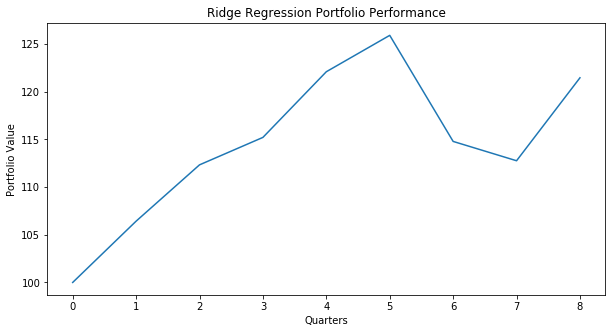

Compounded Result :21.4743935954246 %


In [32]:
total_performance(8)

In [30]:
Predictions.to_csv('./Labels_and_Preds/Predictions_Ridge.csv')

# Ridge for Feature Selections

In [4]:
filenames = open('filenames.txt','r').read()
filenames = filenames.split('\n')[:-1]

f_all_preds = {}
f_all_labels = {}

i = 0

#for i in range(15):
for i in range(len(filenames)):
    try:
        df = pd.read_csv("./All_Data/feature_clean_data/"+str(filenames[i]), delimiter = ',')
        preds,labels = ridge_regression(df)
        #preds = np.reshape(preds,(8,))
        f_all_preds[str(filenames[i])] = preds
        f_all_labels[str(filenames[i])] = labels
    except:
        s=2

/home/anshul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/home/anshul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


In [8]:
f_Predictions = pd.DataFrame.from_dict(f_all_preds, orient='index')
f_labels_df = pd.DataFrame.from_dict(f_all_labels, orient='index')

Quarter :1	 Result :5.58388576563465 %
Quarter :2	 Result :5.584664205528955 %
Quarter :3	 Result :2.808440403293903 %
Quarter :4	 Result :2.0892023184842876 %
Quarter :5	 Result :5.110507037681368 %
Quarter :6	 Result :-7.56233719371983 %
Quarter :7	 Result :-1.5283719382247796 %
Quarter :8	 Result :7.8550599616914 %
Compounded Result :20.74072960155975 %
Quarterly Compounded Growth Rate : 2.3839131635489563 %
Annual Compounded Growth Rate : 9.882086620868158 %
Sharpe Ratio : 0.8466154385960502


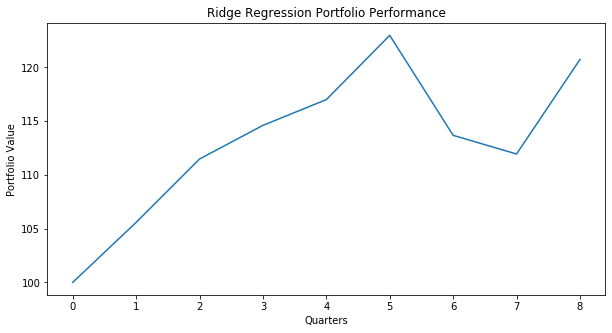

Compounded Result :20.74072960155975 %


In [9]:
total_performance(8,f_Predictions,f_labels_df)

In [10]:
f_Predictions.to_csv('./All_Data/Labels_and_Preds/f_Predictions_Ridge.csv')

# Ridge for standardized set

In [4]:
features_to_select = open('features.txt','r').read()
features_to_select = features_to_select.split('\n')[:-1]

filenames = open('filenames.txt','r').read()
filenames = filenames.split('\n')[:-1]

standard_all_preds = {}
standard_all_labels = {}

i = 0

#for i in range(15):
for i in range(len(filenames)):
    try:
        df1 = pd.read_csv("./All_Data/new_clean_data_v2/"+str(filenames[i]), delimiter = ',')
        df1.set_index("Unnamed: 0", inplace =True)
        df1 = df1.drop(columns = ['Current Assets','Current Liabilities','Current ratio'])
        df1 = df1[features_to_select]
        preds,labels = ridge_regression(df1)
        #preds = np.reshape(preds,(8,))
        standard_all_preds[str(filenames[i])] = preds
        standard_all_labels[str(filenames[i])] = labels
    except:
        s=2

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out

Quarter :1	 Result :4.727977959859911 %
Quarter :2	 Result :6.440523540813908 %
Quarter :3	 Result :4.931189171157773 %
Quarter :4	 Result :3.1076575185720876 %
Quarter :5	 Result :2.6353848403117652 %
Quarter :6	 Result :-3.7246333397355613 %
Quarter :7	 Result :-3.9022559682260414 %
Quarter :8	 Result :10.314969279877625 %
Compounded Result :26.3354328377781 %
Quarterly Compounded Growth Rate : 2.965242479038799 %
Annual Compounded Growth Rate : 12.399035955731442 %
Sharpe Ratio : 0.8988870205045233


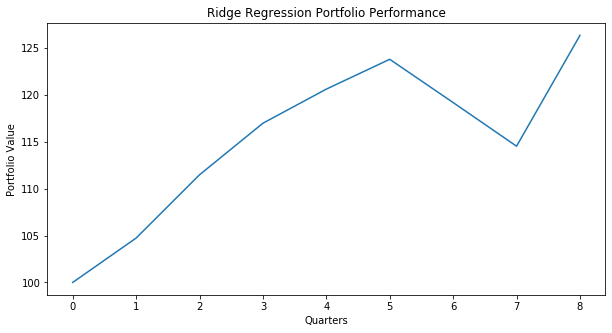

Compounded Result :26.3354328377781 %


In [5]:
standard_Predictions = pd.DataFrame.from_dict(standard_all_preds, orient='index')
standard_labels_df = pd.DataFrame.from_dict(standard_all_labels, orient='index')
total_performance(8,standard_Predictions,standard_labels_df)

In [6]:
standard_Predictions.to_csv('./All_Data/Labels_and_Preds/standard_Predictions_Ridge.csv')